# Traffic stops by Police in San Diego

We use Stanford Open Policing Project dataset to find out Traffic stops by Police officers in <a href ="https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_ca_san_diego_2020_04_01.csv.zip">San Diego </a>. To analysis the dataset, we need to prepare the data.


#### Data Pre-Processing

In [1]:
import pandas as pd
df = pd.read_csv('ca_san_diego_2020_04_01.csv')
df.head(2)

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
0,1,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
1,2,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE


In [2]:
df.isnull().sum()

raw_row_number                       0
date                               183
time                               735
service_area                         0
subject_age                      11963
subject_race                      1234
subject_sex                        661
type                                 0
arrest_made                      34743
citation_issued                  31971
warning_issued                   31971
outcome                          39172
contraband_found                366739
search_conducted                     0
search_person                     2190
search_vehicle                    2190
search_basis                    366739
reason_for_search               368749
reason_for_stop                    219
raw_action_taken                 31971
raw_subject_race_description      1234
dtype: int64

In [3]:
df.drop(['contraband_found','search_basis','reason_for_search','raw_subject_race_description'],axis = 'columns',inplace = True)

In [4]:
df.head(2)

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,search_conducted,search_person,search_vehicle,reason_for_stop,raw_action_taken
0,1,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,False,citation,False,False,False,Moving Violation,Citation
1,2,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,True,warning,False,False,False,Moving Violation,Verbal Warning


In [5]:
df.dropna(subset = ['date','time','subject_age','subject_race','subject_sex','arrest_made','citation_issued','warning_issued','outcome','search_person','search_vehicle','reason_for_stop','raw_action_taken'
],inplace = True)

We have cleaned the data that we dont need for our analysis. Now we study our data types.

In [6]:
df.dtypes

raw_row_number       object
date                 object
time                 object
service_area         object
subject_age         float64
subject_race         object
subject_sex          object
type                 object
arrest_made          object
citation_issued      object
warning_issued       object
outcome              object
search_conducted       bool
search_person        object
search_vehicle       object
reason_for_stop      object
raw_action_taken     object
dtype: object

The time and date are object type which need to be fixed. We propose keeping the both column as one column.

In [7]:
# Concatenate 'date' and 'time' (separated by a space)
combined = df.date.str.cat(df.time, sep=' ')

In [8]:
# Convert 'combined' to datetime format
df['date'] = pd.to_datetime(combined)

In [9]:
df.head(2)

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,search_conducted,search_person,search_vehicle,reason_for_stop,raw_action_taken
0,1,2014-01-01 01:25:00,01:25:00,110,24.0,white,male,vehicular,False,True,False,citation,False,False,False,Moving Violation,Citation
1,2,2014-01-01 05:47:00,05:47:00,320,42.0,white,male,vehicular,False,False,True,warning,False,False,False,Moving Violation,Verbal Warning


In [10]:
df.drop('time',axis = 'columns',inplace = True)

In [11]:
df.columns

Index(['raw_row_number', 'date', 'service_area', 'subject_age', 'subject_race',
       'subject_sex', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'search_conducted', 'search_person',
       'search_vehicle', 'reason_for_stop', 'raw_action_taken'],
      dtype='object')

Also the columns arrest_made,citation_issued, warning_issued,search_conducted,search_person,search_vehicle should be boolean.

In [12]:
df['arrest_made']=df.arrest_made.astype(bool)
df['citation_issued']=df.citation_issued.astype(bool) 
df['warning_issued']=df.warning_issued.astype(bool) 
df['search_conducted']=df.search_conducted.astype(bool) 
df['search_person']=df.search_person.astype(bool) 
df['search_vehicle']=df.search_vehicle.astype(bool) 

In [13]:
df.dtypes

raw_row_number              object
date                datetime64[ns]
service_area                object
subject_age                float64
subject_race                object
subject_sex                 object
type                        object
arrest_made                   bool
citation_issued               bool
warning_issued                bool
outcome                     object
search_conducted              bool
search_person                 bool
search_vehicle                bool
reason_for_stop             object
raw_action_taken            object
dtype: object

To get the accuate date and time of arrests made, we can set time and date as index of the dataframe.

In [14]:
df.set_index('date',inplace= True)

In [16]:
df.head(2)

,raw_row_number,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,search_conducted,search_person,search_vehicle,reason_for_stop,raw_action_taken
date,,,,,,,,,,,,,,,
2014-01-01 01:25:00,1,110,24.0,white,male,vehicular,False,True,False,citation,False,False,False,Moving Violation,Citation
2014-01-01 05:47:00,2,320,42.0,white,male,vehicular,False,False,True,warning,False,False,False,Moving Violation,Verbal Warning


#### Outcome type


In [19]:
df.outcome.value_counts()

citation    200207
warning     109115
arrest        3676
Name: outcome, dtype: int64

In [20]:
df.outcome.value_counts().sum()

312998

So, we have three categories and the total number should match with our data size.

In [21]:
df.shape

(312998, 15)

In [22]:
df.outcome.value_counts(normalize = True)

citation    0.639643
warning     0.348612
arrest      0.011744
Name: outcome, dtype: float64

Overall, 


| Outcome type | Percentage |
| --- | --- |
| Citation | 64% |
| Warning     | 35% |
| Arrest    | 1% |

#### Race based studies

In [23]:
df.subject_race.value_counts()

white                     134510
hispanic                   94250
black                      34470
asian/pacific islander     27667
other                      22101
Name: subject_race, dtype: int64

In [30]:
white  = df[df.subject_race =='white']
hispanic  = df[df.subject_race =='hispanic']
black  = df[df.subject_race =='black']
misc  = df[df.subject_race =='asian/pacific islander']
other  = df[df.subject_race =='other']

We will try to find how many people were cited,arrested or warned comparing the race.

In [27]:
white.outcome.value_counts(normalize = True)

citation    0.649952
warning     0.340294
arrest      0.009754
Name: outcome, dtype: float64

In [33]:
black.outcome.value_counts(normalize = True)

citation    0.537975
warning     0.442443
arrest      0.019582
Name: outcome, dtype: float64

In [28]:
hispanic.outcome.value_counts(normalize = True)

citation    0.660085
warning     0.325825
arrest      0.014090
Name: outcome, dtype: float64

In [31]:
misc.outcome.value_counts(normalize = True)

citation    0.595511
warning     0.395815
arrest      0.008675
Name: outcome, dtype: float64

In [32]:
other.outcome.value_counts(normalize = True)

citation    0.703543
warning     0.290982
arrest      0.005475
Name: outcome, dtype: float64

SO, overall,

|Race| Outcome type | Percentage |
| --- | --- |---|
| White|Citation | 65% |
| White|Warning     | 34.09% |
| White|Arrest    | 0.01% |
| Black|Citation | 53% |
| Black|Warning     | 44% |
| Black|Arrest    | 2% |
| Asian|Citation | 59% |
| Asian|Warning     | 40% |
| Asian|Arrest    |1% |
| Hispanic|Citation | 66% |
| Hispanic|Warning     | 33.09% |
| Hispanic|Arrest    | 1% |
 Other|Citation | 70% |
| Other|Warning     | 29.09% |
| Other|Arrest    | 0.01% |

#### Arrest and Gender
Does gender affect in arresting?

In [36]:
female_arrested = df[(df.subject_sex=='female')& (df.arrest_made== True)]

In [40]:
female_arrested.shape #only female who were arrested

(797, 15)

In [41]:
female_or_arrested = df[(df.subject_sex=='female')| (df.arrest_made== True)]
female_or_arrested.shape

(113298, 15)

In [42]:
male_arrested = df[(df.subject_sex=='male')& (df.arrest_made== True)]
male_arrested.shape #only male who were arrested

(2879, 15)

SO, more male were arrested than female.

#### Reeasons behind stopping the subject


In [43]:
df.reason_for_stop.unique()

array(['Moving Violation', 'Equipment Violation', 'Other',
       'Muni, County, H&S Code', 'UNI, &County, H&&S Code',
       'Radio Call/Citizen Contact', 'Personal Knowledge/Informant',
       'Suspect Info (I.S., Bulletin, Log)',
       'Moving Violation|Equipment Violation',
       'Equipment Violation|Moving Violation',
       'Radio Call/Citizen Contact|Moving Violation',
       'Equipment Violation|Equipment Violation|Moving Violation',
       '&Moving Violation|Moving Violation', '&Moving Violation',
       'Moving Violation|Muni, County, H&S Code',
       'Personal Observ/Knowledge', 'Suspect Info', 'Moving Violation|NA',
       'Equipment Violation|Radio Call/Citizen Contact',
       'NA|Equipment Violation',
       'Moving Violation|Radio Call/Citizen Contact',
       'Equipment Violation|NA', '&Equipment Violation',
       '&Radio Call/Citizen Contact', 'NA|Moving Violation',
       'Moving Violation|Equipment Violation|Equipment Violation',
       'Muni, County, H&S Code|M

In [47]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = df[(df.subject_sex=='female') & (df.reason_for_stop=='Moving Violation')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = df[(df.subject_sex=='male') & (df.reason_for_stop=='Moving Violation')]

In [49]:
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.outcome.value_counts(normalize=True))

citation    0.702223
warning     0.292296
arrest      0.005481
Name: outcome, dtype: float64
citation    0.687499
warning     0.302085
arrest      0.010416
Name: outcome, dtype: float64


Clearly, very few female were arrested compared to male.But about 70% female and 68% male got ticket for speed.

Now another question. Does the gender affect whose vehicle is searched?

Overall, arrests rate:
    

In [51]:
df.arrest_made.value_counts(normalize = True)

False    0.988256
True     0.011744
Name: arrest_made, dtype: float64

In [52]:
df.arrest_made.mean() # wont work unless the dtype is bool

0.011744483990313036

#### Area based arrest

In [54]:
df.service_area.unique()

array(['110', '320', '610', '930', '820', '710', '120', '230', '240',
       '720', '430', '310', '510', '810', 'Unknown', '440', '830', '520',
       '620', '630', '130', '530', '840'], dtype=object)

In [55]:
df[df.service_area=='110'].arrest_made.mean()

0.010811082616784835

In [57]:
df.groupby('service_area').arrest_made.mean()

service_area
110        0.010811
120        0.013237
130        0.000000
230        0.007178
240        0.006391
310        0.007791
320        0.006744
430        0.018186
440        0.021990
510        0.024510
520        0.010577
530        0.014760
610        0.008176
620        0.013047
630        0.012270
710        0.006311
720        0.010007
810        0.014318
820        0.021443
830        0.027717
840        0.000000
930        0.006615
Unknown    0.009582
Name: arrest_made, dtype: float64

So, maximum arrested area was 830 and minimum 130.

In [60]:
df.groupby(['service_area','subject_sex']).arrest_made.mean()

service_area  subject_sex
110           female         0.007668
              male           0.012850
120           female         0.008860
              male           0.015516
130           female         0.000000
              male           0.000000
230           female         0.004208
              male           0.009237
240           female         0.003039
              male           0.008199
310           female         0.006433
              male           0.008568
320           female         0.004549
              male           0.008058
430           female         0.008371
              male           0.023444
440           female         0.012288
              male           0.026769
510           female         0.014255
              male           0.028879
520           female         0.007496
              male           0.011947
530           female         0.009434
              male           0.018182
610           female         0.005495
              male      

#### Search Conduct

In [61]:
# Check the data type of 'search_conducted'
print(df.search_conducted.dtype)

bool


In [62]:
# Calculate the search rate by counting the values
print(df.search_conducted.value_counts(normalize=True))

False    0.962313
True     0.037687
Name: search_conducted, dtype: float64


About 96% search conduct bears no outcome.

In [64]:
#calculate the search rate by taking the mean
print(df.search_conducted.mean())

0.037687141770873935


In [67]:
# Calculate the search rate for both groups simultaneously
print(df.groupby('subject_sex').search_conducted.mean())

subject_sex
female    0.020676
male      0.046959
Name: search_conducted, dtype: float64


So male drivers are search more than twice as often as female drivers.But Why ?Are males and females searched at about the same rate for each violation?

In [74]:
# Calculate the search rate for each combination of gender and violation
print(df.groupby(['outcome','subject_sex']).search_conducted.mean())

outcome   subject_sex
arrest    female         0.647428
          male           0.817298
citation  female         0.019662
          male           0.040339
warning   female         0.009047
          male           0.027989
Name: search_conducted, dtype: float64


For all types of outcome, the search rate is higher for males than females.

#### Search the person 

In [75]:
df.search_person.mean()

0.018811621799500317

1% of all traffic stops resulted the subject to be searched by police

In [79]:
person = df[df.search_person == True]
person.arrest_made.mean()

0.39877717391304346

39% people were arrested while conducting in person search.

#### Time vs arrest
Does time of day affect arrest rate?

In [81]:
# Calculate the hourly arrest rate
print(df.groupby(df.index.hour).arrest_made.mean())

date
0     0.016654
1     0.043937
2     0.054959
3     0.038514
4     0.022501
5     0.008413
6     0.012117
7     0.007246
8     0.004934
9     0.006259
10    0.005587
11    0.006066
12    0.003333
13    0.005156
14    0.005943
15    0.010071
16    0.010066
17    0.011545
18    0.014321
19    0.013749
20    0.015277
21    0.014568
22    0.015332
23    0.022141
Name: arrest_made, dtype: float64


In [83]:
# Save the hourly arrest rate
hourly_arrest_rate = df.groupby(df.index.hour).arrest_made.mean()

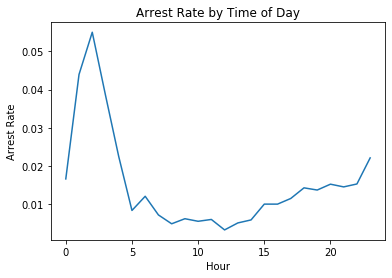

In [84]:
import matplotlib.pyplot as plt


# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

Clearly, the arrest rate has a significant spike at night and then dips in the early morning hours.

In [86]:
# Create a frequency table of race and gender
print(pd.crosstab(df.subject_race, df.subject_sex))

subject_sex             female   male
subject_race                         
asian/pacific islander   10565  17102
black                    10432  24038
hispanic                 30969  63281
other                     6912  15189
white                    51541  82969


In [88]:
table = pd.crosstab(df.subject_race, df.subject_sex)

In [90]:
table.loc[:]

subject_sex,female,male
subject_race,,
asian/pacific islander,10565,17102
black,10432,24038
hispanic,30969,63281
other,6912,15189
white,51541,82969


In [91]:
table.loc['black':'white']

subject_sex,female,male
subject_race,,
black,10432,24038
hispanic,30969,63281
other,6912,15189
white,51541,82969


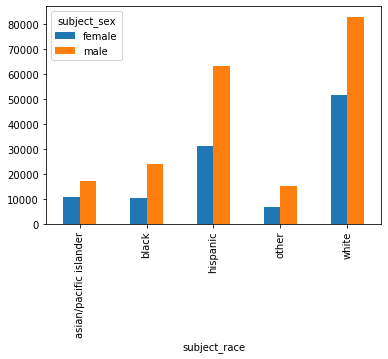

In [92]:
table.plot(kind = 'bar')
plt.show()

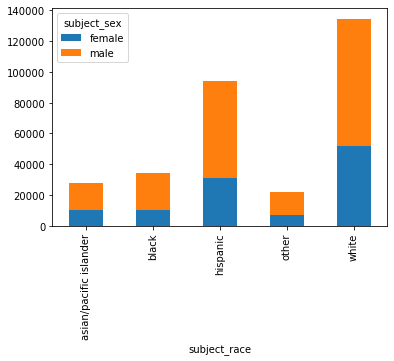

In [93]:
table.plot(kind = 'bar',stacked = True)
plt.show()

In [95]:
# Save the resulting Series as 'stop_length'
stop_length = df.groupby('reason_for_stop').arrest_made.mean()

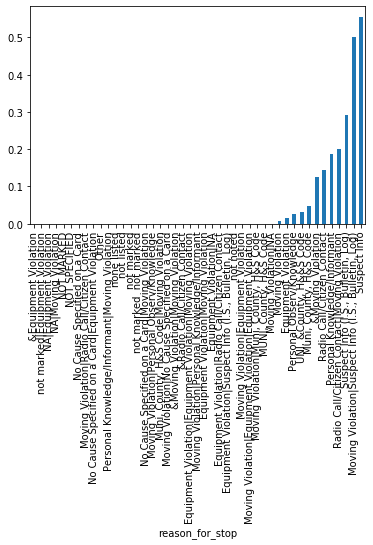

In [99]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='bar')

# Display the plot
plt.show()
